In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('landsat_analysis_results.csv')

# Define train and test years
train_years = range(1987, 2017)  # 1987 to 2016
test_years = range(2016, 2024)   # 2017 to 2023

# Prepare the data
features = ['Water (%)', 'Coal (%)', 'Crop (%)', 'Forest (%)', 'Urban (%)']
X_train = df[df['Year'].isin(train_years)][features].values
X_test = df[df['Year'].isin(test_years)][features].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Build the BiLSTM model
model = Sequential([
    Bidirectional(LSTM(50, activation='relu', return_sequences=True), input_shape=(X_train_normalized.shape[1], 1)),
    Bidirectional(LSTM(25, activation='relu')),
    Dense(X_train_normalized.shape[1])
])
model.compile(optimizer='adam', loss='mse')

# Reshape input to be [samples, time steps, features]
X_train_reshaped = np.reshape(X_train_normalized, (X_train_normalized.shape[0], X_train_normalized.shape[1], 1))
X_test_reshaped = np.reshape(X_test_normalized, (X_test_normalized.shape[0], X_test_normalized.shape[1], 1))

# Train the model
history = model.fit(X_train_reshaped, X_train_normalized, epochs=500, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions
train_predict = model.predict(X_train_reshaped)
test_predict = model.predict(X_test_reshaped)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate MSE and RMSE for each feature
for i, feature in enumerate(features):
    train_mse = mean_squared_error(X_train[:, i], train_predict[:, i])
    train_rmse = np.sqrt(train_mse)
    test_mse = mean_squared_error(X_test[:, i], test_predict[:, i])
    test_rmse = np.sqrt(test_mse)
    
    print(f"\n{feature}")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")

# # Plot the results
# plt.figure(figsize=(15, 10))
# for i, feature in enumerate(features):
#     plt.subplot(3, 2, i+1)
    
#     plt.plot(df['Year'], df[feature], label='Actual', color='blue')
#     plt.plot(df[df['Year'].isin(train_years)]['Year'], train_predict[:, i], label='Train Predict', color='orange')
#     plt.plot(df[df['Year'].isin(test_years)]['Year'], test_predict[:, i], label='Test Predict', color='green')
    
#     plt.axvline(x=2016, color='red', linestyle='--', label='Train-Test Split')
    
#     plt.legend()
#     plt.title(f'{feature} Prediction (BiLSTM)')
#     plt.xlabel('Year')
#     plt.ylabel('Percentage')

# plt.tight_layout()
# plt.show()

# # Plot learning curves
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

C:\Users\Nikhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step

Water (%)
Train MSE: 1.2537
Train RMSE: 1.1197
Test MSE: 5.9835
Test RMSE: 2.4461

Coal (%)
Train MSE: 9.8223
Train RMSE: 3.1341
Test MSE: 44.1094
Test RMSE: 6.6415

Crop (%)
Train MSE: 0.9988
Train RMSE: 0.9994
Test MSE: 3.7607
Test RMSE: 1.9392

Forest (%)
Train MSE: 1.1394
Train RMSE: 1.0674
Test MSE: 6.2327
Test RMSE: 2.4965

Urban (%)
Train MSE: 0.1460
Train RMSE: 0.3820
Test MSE: 5.1631
Test RMSE: 2.2723


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Future Predictions (BiLSTM):
Year 2024:
  Water (%): 11.32%
  Coal (%): 11.79%
  Crop (%): 47.08%
  Forest (%): 7.92%
  Urban (%): 22.11%
Year 2025:
  Water (%): 10.97%
  Coal (%): 11.93%
  Crop (%): 46.98%
  Forest (%): 8.22%
  Urban (%): 21.87%
Year 2026:
  Water (%): 10.72%
  Coal (%): 11.82%
  Crop (%): 47.32%
  Forest (%): 8.37%
  Urban (%): 21.75%
Year 2027:
  Water (%): 10.53%
  Coal (%): 11.63%
  Crop (%): 47.68%
  Forest (%): 8.51%
  Urban (%): 21.68%
Year 2028:
  Water (%): 10.33%
  Coal (%): 11.45%
  Crop (%): 48.01%
  Forest (%): 8.64%
  Urban (%): 21.63%


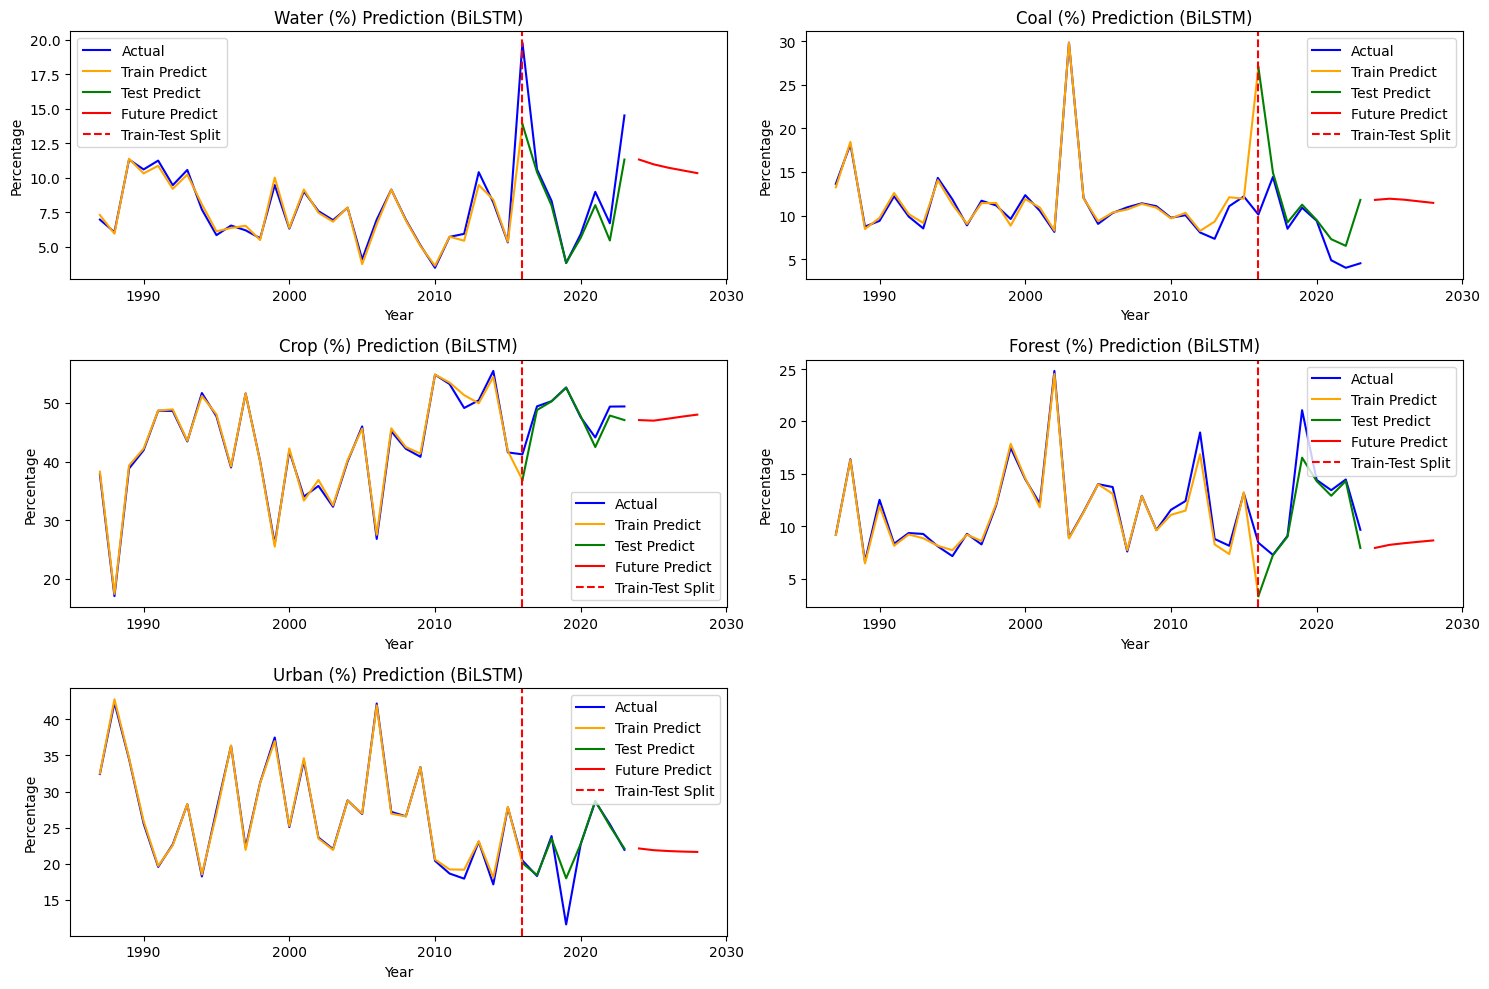

In [2]:
# Future prediction
last_data_point = X_test_normalized[-1].reshape(1, X_test_normalized.shape[1], 1)
future_year_count = 5  # Rename this to avoid conflict
future_predictions = []

for _ in range(future_year_count):
    next_prediction = model.predict(last_data_point)
    future_predictions.append(next_prediction[0])
    last_data_point = next_prediction.reshape(1, X_test_normalized.shape[1], 1)

future_predictions = np.array(future_predictions)
future_predictions = scaler.inverse_transform(future_predictions)

print("\nFuture Predictions (BiLSTM):")
for i, year in enumerate(range(df['Year'].max() + 1, df['Year'].max() + 1 + future_year_count)):
    print(f"Year {year}:")
    for j, feature in enumerate(features):
        print(f"  {feature}: {future_predictions[i, j]:.2f}%")

# Plot including future predictions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    
    # Plot actual data
    plt.plot(df['Year'], df[feature], label='Actual', color='blue')
    
    # Plot train and test predictions
    plt.plot(df[df['Year'].isin(train_years)]['Year'], train_predict[:, i], label='Train Predict', color='orange')
    plt.plot(df[df['Year'].isin(test_years)]['Year'], test_predict[:, i], label='Test Predict', color='green')
    
    # Corrected: Rename to avoid conflict with loop variable
    future_year_range = range(df['Year'].max() + 1, df['Year'].max() + 1 + future_year_count)
    plt.plot(future_year_range, future_predictions[:, i], label='Future Predict', color='red')
    
    # Add train-test split line
    plt.axvline(x=2016, color='red', linestyle='--', label='Train-Test Split')
    
    # Add labels and legend
    plt.legend()
    plt.title(f'{feature} Prediction (BiLSTM)')
    plt.xlabel('Year')
    plt.ylabel('Percentage')

plt.tight_layout()
plt.show()


C:\Users\Nikhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step

Water (%)
Train MSE: 3.4027
Train RMSE: 1.8446
Test MSE: 15.1932
Test RMSE: 3.8978

Coal (%)
Train MSE: 28.8562
Train RMSE: 5.3718
Test MSE: 132.7017
Test RMSE: 11.5196

Crop (%)
Train MSE: 11.9389
Train RMSE: 3.4553
Test MSE: 49.3038
Test RMSE: 7.0217

Forest (%)
Train MSE: 0.1434
Train RMSE: 0.3786
Test MSE: 0.5362
Test RMSE: 0.7323

Urban (%)
Train MSE: 0.0968
Train RMSE: 0.3111
Test MSE: 0.2287
Test RMSE: 0.4782
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Future Predictions (LSTM):
Year 2024:
  Water (%): 8.62%
  Coal (%): 18.40%
  Crop (%): 42.61%
  Forest (%): 8.26%
  Urban (%): 22.62%
Year 2025:
  Water (%): 10.50%
  Coal (%): 15.40%
  Crop (%): 42.51%
  Forest (%): 7.58%
  Urban (%): 22.25%
Year 2026:
  Water (%): 11.41%
  Coal (%): 13.11%
  Crop (%): 46.8

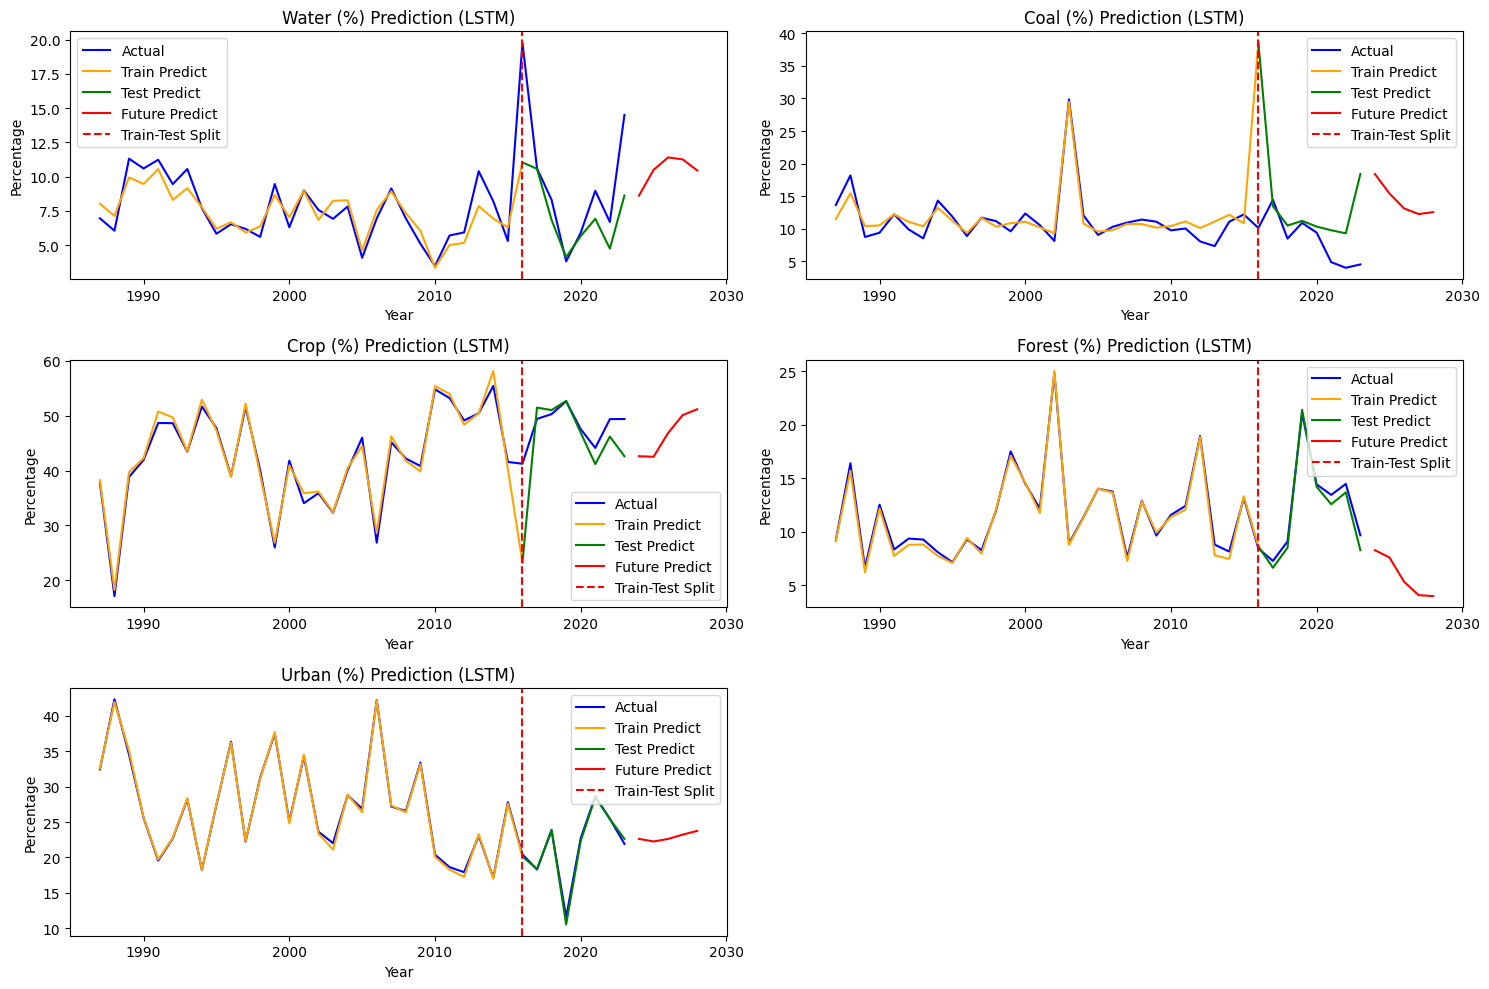

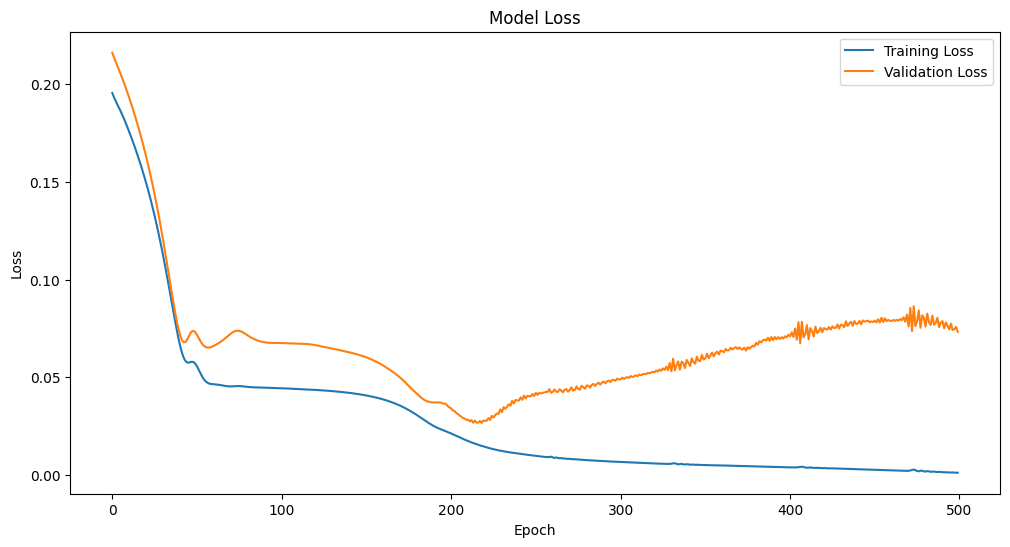

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('landsat_analysis_results.csv')

# Define train and test years
train_years = range(1987, 2017)  # 1987 to 2016
test_years = range(2016, 2024)   # 2017 to 2023

# Prepare the data
features = ['Water (%)', 'Coal (%)', 'Crop (%)', 'Forest (%)', 'Urban (%)']
X_train = df[df['Year'].isin(train_years)][features].values
X_test = df[df['Year'].isin(test_years)][features].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_normalized.shape[1], 1)),
    LSTM(25, activation='relu'),
    Dense(X_train_normalized.shape[1])
])
model.compile(optimizer='adam', loss='mse')

# Reshape input to be [samples, time steps, features]
X_train_reshaped = np.reshape(X_train_normalized, (X_train_normalized.shape[0], X_train_normalized.shape[1], 1))
X_test_reshaped = np.reshape(X_test_normalized, (X_test_normalized.shape[0], X_test_normalized.shape[1], 1))

# Train the model
history = model.fit(X_train_reshaped, X_train_normalized, epochs=500, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions
train_predict = model.predict(X_train_reshaped)
test_predict = model.predict(X_test_reshaped)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate MSE and RMSE for each feature
for i, feature in enumerate(features):
    train_mse = mean_squared_error(X_train[:, i], train_predict[:, i])
    train_rmse = np.sqrt(train_mse)
    test_mse = mean_squared_error(X_test[:, i], test_predict[:, i])
    test_rmse = np.sqrt(test_mse)
    
    print(f"\n{feature}")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")

# Future prediction
last_data_point = X_test_normalized[-1].reshape(1, X_test_normalized.shape[1], 1)
future_year_count = 5
future_predictions = []

for _ in range(future_year_count):
    next_prediction = model.predict(last_data_point)
    future_predictions.append(next_prediction[0])
    last_data_point = next_prediction.reshape(1, X_test_normalized.shape[1], 1)

future_predictions = np.array(future_predictions)
future_predictions = scaler.inverse_transform(future_predictions)

print("\nFuture Predictions (LSTM):")
for i, year in enumerate(range(df['Year'].max() + 1, df['Year'].max() + 1 + future_year_count)):
    print(f"Year {year}:")
    for j, feature in enumerate(features):
        print(f"  {feature}: {future_predictions[i, j]:.2f}%")

# Plot the results including future predictions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    
    # Plot actual data
    plt.plot(df['Year'], df[feature], label='Actual', color='blue')
    
    # Plot train and test predictions
    plt.plot(df[df['Year'].isin(train_years)]['Year'], train_predict[:, i], label='Train Predict', color='orange')
    plt.plot(df[df['Year'].isin(test_years)]['Year'], test_predict[:, i], label='Test Predict', color='green')
    
    # Plot future predictions
    future_years_range = range(df['Year'].max() + 1, df['Year'].max() + 1 + future_year_count)
    plt.plot(future_years_range, future_predictions[:, i], label='Future Predict', color='red')
    
    # Add train-test split line
    plt.axvline(x=2016, color='red', linestyle='--', label='Train-Test Split')
    
    # Add legend, title, labels
    plt.legend()
    plt.title(f'{feature} Prediction (LSTM)')
    plt.xlabel('Year')
    plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
